# Python Data Analysis

## Questions - 

1. <b><i>What is the most frequent genre of movies released on Netflix?</i></b>
2. <b><i>What genre has highest votes in Vote_Average column?</i></b>
3. <b><i>What movies got the highest popularity? What are their genre?</i></b>
4. <b><i>What movies got the lowest popularity? What are their genre?</i></b>
5. <b><i>Which year has the most filmed movies?</i></b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mymoviedb.csv", lineterminator = "\n")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [5]:
df["Genre"]

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


## Exploration Summary

- We have a dataframe consisting of 9827 rows and 9 columns.
- Our dataset looks a bit tidy with no NANs nor duplicates.
- Release_Date column needs to be casted into date time to extract only the year value.
- Overview, Original_Language and Poster_Url wouldn't be so useful during analysis, so we'll drop them.
- There is noticeable outliers in Popularity column.
- Vote_Average better be categorized for people analysis.
- Genre column has comma separated values and white spaces that needs to be handled and casted into category.

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [11]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [13]:
# We've changed the Release_Date to Release_Year, Now, 
# Dropping the columns - Overview, Original_Language, Poster_Url

cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis = 1, inplace = True) # Columns ke liye axis = 1
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


## Categorizing Vote_Average column

We would cut the Vote_Average values and make 4 categories - 
- <b><i>Good</i></b>
- <b><i>Average</i></b>
- <b><i>Below Average</i></b>
- <b><i>Bad</i></b>

to describe it in a better manner using categorize_col() function.

In [16]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [17]:
labels = ["Bad", "Below Average", "Average", "Good"]

categorize_col(df, "Vote_Average", labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Good,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Good,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,Good,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Bad,Horror
9824,2016,The Offering,13.355,94,Bad,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History"


In [18]:
df["Vote_Average"].unique()

['Good', 'Below Average', 'Average', 'Bad', NaN]
Categories (4, object): ['Bad' < 'Below Average' < 'Average' < 'Good']

In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Good,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Good,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [20]:
df["Vote_Average"].value_counts()

Vote_Average
Bad              2467
Good             2450
Average          2412
Below Average    2398
Name: count, dtype: int64

In [21]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [22]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Good,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Good,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


<b><i>We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie.</i></b>

In [24]:
df['Genre'] = df['Genre'].str.split(", ")
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Good,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Good,Science Fiction
3,2022,The Batman,3827.658,1151,Good,Crime
4,2022,The Batman,3827.658,1151,Good,Mystery


<b><i>Casting column into category - </i></b>

In [26]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [28]:
df.nunique() # Number of unique values

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

## Data Visualization 

In [30]:
sns.set_style('whitegrid')

### What is the most frequent genre of movies released on Netflix?

In [32]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

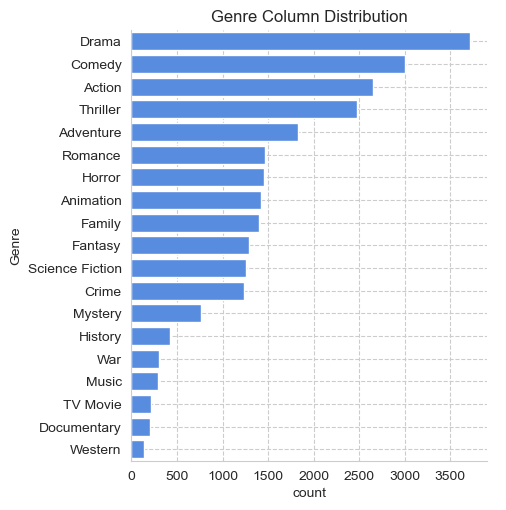

In [33]:
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index, 
           color = '#4287f5')
plt.title("Genre Column Distribution")
plt.grid(True, linestyle = '--')
plt.show()

### What genre has highest votes in Vote_Average column?

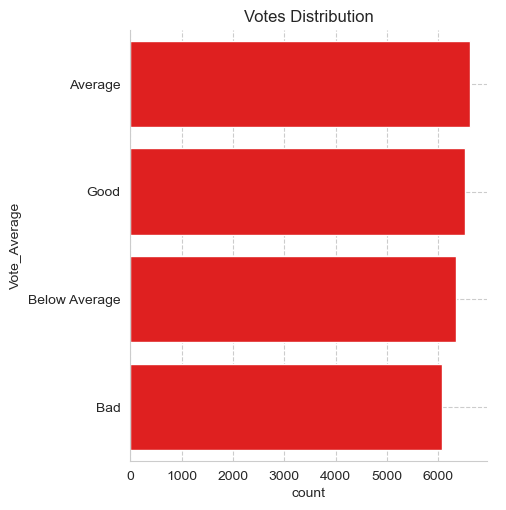

In [35]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
           order = df['Vote_Average'].value_counts().index, 
           color = 'red')
plt.title('Votes Distribution')
plt.grid(True, linestyle = '--')
plt.show()

### What movies got the highest popularity? What are their genre?

In [37]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Good,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Good,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Good,Science Fiction


### What movies got the lowest popularity? What are their genre?

In [39]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Good,War
25550,1984,Threads,13.354,186,Good,Drama
25551,1984,Threads,13.354,186,Good,Science Fiction


### Which year has the most filmed movies?

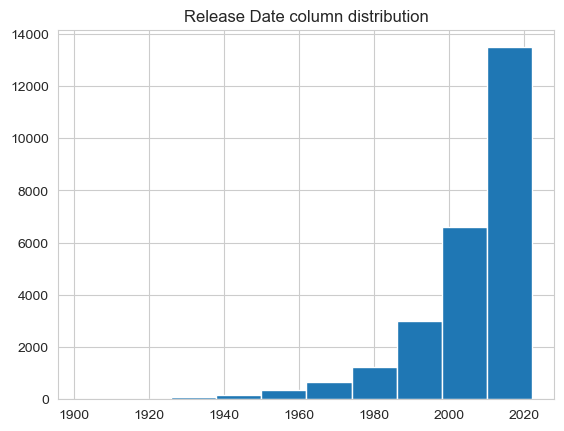

In [41]:
df['Release_Date'].hist()
plt.title("Release Date column distribution")
plt.show()

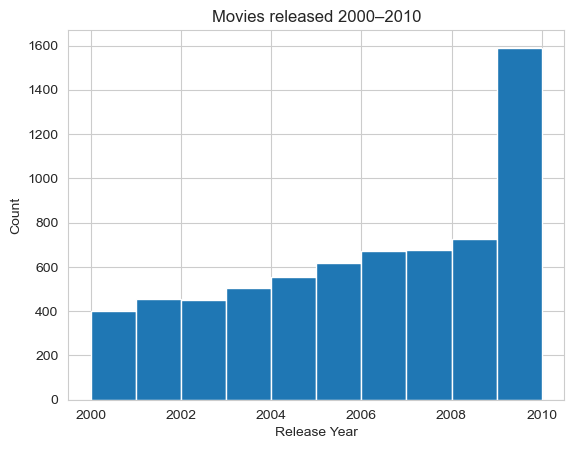

In [42]:
mask = (df['Release_Date'] >= 2000) & (df['Release_Date'] <= 2010)
df.loc[mask, 'Release_Date'].hist(bins = 10)
plt.title("Movies released 2000–2010")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

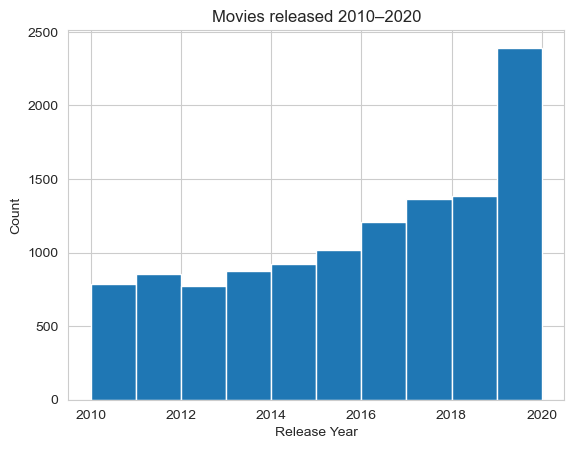

In [43]:
mask = (df['Release_Date'] >= 2010) & (df['Release_Date'] <= 2020)
df.loc[mask, 'Release_Date'].hist(bins = 10)
plt.title("Movies released 2010–2020")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

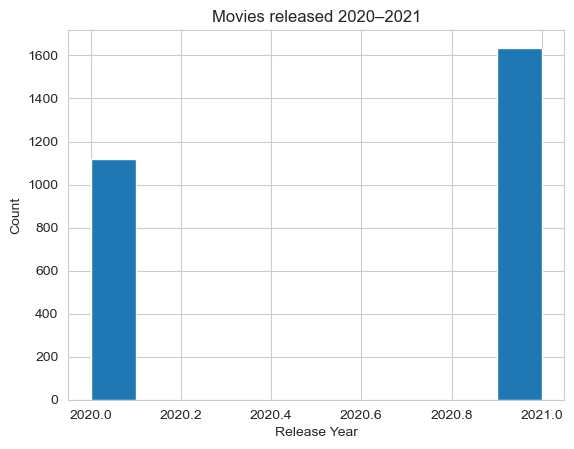

In [44]:
mask = (df['Release_Date'] >= 2020) & (df['Release_Date'] < 2022)
df.loc[mask, 'Release_Date'].hist()
plt.title("Movies released 2020–2021")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

<b><i>Highest Number of movies released in the year - 2019</i></b>

<hr>

## Summary 

<b><i>Q1. What is the most frequent genre of movies released on Netflix?</i></b>

<b><i>Ans -</i></b> Drama is the most frequent genre which has appeared 3715 times out of 25552 which is more than 14.5% of the total frequency of genres.

<b><i>Q2. What genre has highest votes in Vote_Average column?</i></b>

<b><i>Ans -</i></b> Vote Distribution is almost neck to neck but Average secures the highest number.

<b><i>Q3. What movies got the highest popularity? What are their genre?</i></b>

<b><i>Ans -</i></b> Spider-Man: No Way Home released in 2021 secured the highest popularity. Its genres are - Action, Adventure, Science Fiction.

<b><i>Q4. What movies got the lowest popularity? What are their genre?</i></b>

<b><i>Ans -</i></b> The United States vs. Billie Holiday released in 2021 secured the lowest popularity. Its genres are - Music, Drama, History and Threads released in 1984 also secured equally low popularity... Its respective genres are - War, Drama, Science Fiction.

<b><i>Q5. Which year has the most filmed movies?</i></b>

<b><i>Ans -</i></b> Year 2019 is recorded as the year of most releases in the given data... with over 2250 releases.